## Instituto Federal da Paraíba
## Disciplina: Mineração de Dados
## Professor: Paulo Ribeiro
## Alunos: Filipe Salomão, Hércules de Sousa e Matheus Alves
##
## Projeto: Classificação de Gêneros Musicais

Importanto bibliotecas necessárias:

In [64]:
from IPython.display import display, HTML
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from joblib import load
from scipy.stats import kurtosis
from scipy.stats import skew
import warnings

Reutilizando a função **_get_features_**:

In [2]:
def get_features(y, sr, n_fft=1024, hop_length=512):
    features = {}

    features['spectral_centroid'] = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length).ravel()
    features['spectral_rolloff'] = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length).ravel()
    features['zero_crossing_rate'] = librosa.feature.zero_crossing_rate(y, frame_length=n_fft, hop_length=hop_length).ravel()
    features['rms'] = librosa.feature.rms(y=y, frame_length=n_fft, hop_length=hop_length).ravel()
    features['onset_strength'] = librosa.onset.onset_strength(y=y, sr=sr).ravel()
    features['spectral_contrast'] = librosa.feature.spectral_contrast(y=y, sr=sr).ravel()
    features['spectral_bandwidth'] = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length).ravel()
    features['spectral_flatness'] = librosa.feature.spectral_flatness(y=y, n_fft=n_fft, hop_length=hop_length).ravel()

    mfcc = librosa.feature.mfcc(y=y, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

    for index, v_mfcc in enumerate(mfcc):
        features['mfcc_{}'.format(index)] = v_mfcc.ravel()

    def get_moments(descriptors):
        result = {}

        for k, v in descriptors.items():
            result['{}_max'.format(k)] = np.max(v)
            result['{}_min'.format(k)] = np.min(v)
            result['{}_mean'.format(k)] = np.mean(v)
            result['{}_std'.format(k)] = np.std(v)
            result['{}_kurtosis'.format(k)] = kurtosis(v)
            result['{}_skew'.format(k)] = skew(v)

        return result

    additional_features = get_moments(features)
    additional_features['tempo'] = librosa.feature.tempo(y=y, sr=sr)[0]

    return additional_features

Diretório onde estão as músicas a serem testadas:

In [3]:
music_directory = 'music'

Carregando todos os modelos para testá-los:

In [4]:
pipe_lr = load('./models/pipe_lr.joblib')

In [5]:
pipe_dt = load('./models/pipe_dt.joblib')

In [6]:
pipe_rf = load('./models/pipe_rf.joblib')

In [7]:
pipe_svm = load('./models/pipe_svm.joblib')

In [8]:
pipe_knn = load('./models/pipe_knn.joblib')

In [9]:
pipe_nb = load('./models/pipe_nb.joblib')

A função **_test_model_** recebe um pipeline de modelo, um diretório contendo músicas e uma lista de gêneros musicais. Ela realiza predições das músicas de cada gênero utilizando o modelo fornecido e imprime os resultados das predições. Durante a execução, são ignorados os avisos gerados.

In [10]:
def test_model(pipe, directory):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')

        results = {}

        genres = os.listdir(directory)

        for genre in genres:
            genre_results = []

            print(f'Realizando predições de músicas de {genre}...')

            genre_directory = os.path.join(directory, genre)
            genre_music_files = os.listdir(genre_directory)

            for music in genre_music_files:
                signal, sr = librosa.load(os.path.join(genre_directory, music))
                features = get_features(signal, sr)
                song = pd.DataFrame([features])

                pred = pipe.predict(song)[0]

                genre_results.append((genre, music, pred))

            results[genre] = genre_results

        return results

Realizando as predições para cada um dos modelos:

In [11]:
predictions_lr = test_model(pipe_lr, music_directory)

Realizando predições de músicas de forró...
Realizando predições de músicas de funk...
Realizando predições de músicas de jazz...
Realizando predições de músicas de rap brasileiro...
Realizando predições de músicas de rap internacional...
Realizando predições de músicas de rock brasileiro...
Realizando predições de músicas de rock internacional...
Realizando predições de músicas de samba...
Realizando predições de músicas de sertanejo...


In [12]:
predictions_dt = test_model(pipe_dt, music_directory)

Realizando predições de músicas de forró...
Realizando predições de músicas de funk...
Realizando predições de músicas de jazz...
Realizando predições de músicas de rap brasileiro...
Realizando predições de músicas de rap internacional...
Realizando predições de músicas de rock brasileiro...
Realizando predições de músicas de rock internacional...
Realizando predições de músicas de samba...
Realizando predições de músicas de sertanejo...


In [13]:
predictions_rf = test_model(pipe_rf, music_directory)

Realizando predições de músicas de forró...
Realizando predições de músicas de funk...
Realizando predições de músicas de jazz...
Realizando predições de músicas de rap brasileiro...
Realizando predições de músicas de rap internacional...
Realizando predições de músicas de rock brasileiro...
Realizando predições de músicas de rock internacional...
Realizando predições de músicas de samba...
Realizando predições de músicas de sertanejo...


In [14]:
predictions_svm = test_model(pipe_svm, music_directory)

Realizando predições de músicas de forró...
Realizando predições de músicas de funk...
Realizando predições de músicas de jazz...
Realizando predições de músicas de rap brasileiro...
Realizando predições de músicas de rap internacional...
Realizando predições de músicas de rock brasileiro...
Realizando predições de músicas de rock internacional...
Realizando predições de músicas de samba...
Realizando predições de músicas de sertanejo...


In [15]:
predictions_knn = test_model(pipe_knn, music_directory)

Realizando predições de músicas de forró...
Realizando predições de músicas de funk...
Realizando predições de músicas de jazz...
Realizando predições de músicas de rap brasileiro...
Realizando predições de músicas de rap internacional...
Realizando predições de músicas de rock brasileiro...
Realizando predições de músicas de rock internacional...
Realizando predições de músicas de samba...
Realizando predições de músicas de sertanejo...


In [16]:
predictions_nb = test_model(pipe_nb, music_directory)

Realizando predições de músicas de forró...
Realizando predições de músicas de funk...
Realizando predições de músicas de jazz...
Realizando predições de músicas de rap brasileiro...
Realizando predições de músicas de rap internacional...
Realizando predições de músicas de rock brasileiro...
Realizando predições de músicas de rock internacional...
Realizando predições de músicas de samba...
Realizando predições de músicas de sertanejo...


Essa função calcula a precisão para cada gênero de música com base nos dados fornecidos que, no nosso caso, são os dados com as predições.

In [111]:
def calculate_accuracy(data):
    genre_accuracy = {}

    for genre, songs in data.items():
        correct_predictions = 0
        total_songs = len(songs)

        for true_label, _, predicted_label in songs:
            if true_label.split(' ')[0] == predicted_label:
                correct_predictions += 1

        accuracy = correct_predictions / total_songs
        genre_accuracy[genre] = accuracy

    return genre_accuracy

A função _display_predictions_ recebe um dicionário de dados e cria uma tabela para exibir as previsões de gênero das músicas.

In [112]:
def display_predictions(data):
    data_list = [(song_name, true_genre, predicted_genre) for genre, predictions in data.items() for true_genre, song_name, predicted_genre in predictions]
    
    df = pd.DataFrame(data_list, columns=['Nome', 'Gênero verdadeiro', 'Predição'])
    html_table = df.to_html(index=False)

    display(HTML(html_table))

Visualizando todas as predições em cada modelo:

In [113]:
display_predictions(predictions_lr)

Nome,Gênero verdadeiro,Predição
Gabriel Diniz - Paraquedas.mp3,forró,forró
Mano Walter - Monta Logo Vai.mp3,forró,forró
Matheus Fernandes - Nem Vá.mp3,forró,forró
Murilo Huff - Quem tá Pegando.mp3,forró,forró
Simone & Simaria - Amoreco.mp3,forró,forró
Wesley Safadão - Camarote.mp3,forró,forró
Wesley Safadão - Covardia.mp3,forró,forró
Zé Felipe - Vacilão.mp3,forró,funk
Zé Vaqueiro - Eu Me Rendo (feat. Iguinho e Lulinha).mp3,forró,forró
Zé Vaqueiro - Termina Logo.mp3,forró,forró


In [114]:
display_predictions(predictions_dt)

Nome,Gênero verdadeiro,Predição
Gabriel Diniz - Paraquedas.mp3,forró,forró
Mano Walter - Monta Logo Vai.mp3,forró,forró
Matheus Fernandes - Nem Vá.mp3,forró,rap
Murilo Huff - Quem tá Pegando.mp3,forró,forró
Simone & Simaria - Amoreco.mp3,forró,forró
Wesley Safadão - Camarote.mp3,forró,forró
Wesley Safadão - Covardia.mp3,forró,forró
Zé Felipe - Vacilão.mp3,forró,forró
Zé Vaqueiro - Eu Me Rendo (feat. Iguinho e Lulinha).mp3,forró,forró
Zé Vaqueiro - Termina Logo.mp3,forró,forró


In [115]:
display_predictions(predictions_rf)

Nome,Gênero verdadeiro,Predição
Gabriel Diniz - Paraquedas.mp3,forró,forró
Mano Walter - Monta Logo Vai.mp3,forró,forró
Matheus Fernandes - Nem Vá.mp3,forró,forró
Murilo Huff - Quem tá Pegando.mp3,forró,forró
Simone & Simaria - Amoreco.mp3,forró,forró
Wesley Safadão - Camarote.mp3,forró,forró
Wesley Safadão - Covardia.mp3,forró,forró
Zé Felipe - Vacilão.mp3,forró,forró
Zé Vaqueiro - Eu Me Rendo (feat. Iguinho e Lulinha).mp3,forró,forró
Zé Vaqueiro - Termina Logo.mp3,forró,forró


In [116]:
display_predictions(predictions_svm)

Nome,Gênero verdadeiro,Predição
Gabriel Diniz - Paraquedas.mp3,forró,forró
Mano Walter - Monta Logo Vai.mp3,forró,forró
Matheus Fernandes - Nem Vá.mp3,forró,forró
Murilo Huff - Quem tá Pegando.mp3,forró,forró
Simone & Simaria - Amoreco.mp3,forró,forró
Wesley Safadão - Camarote.mp3,forró,rap
Wesley Safadão - Covardia.mp3,forró,forró
Zé Felipe - Vacilão.mp3,forró,funk
Zé Vaqueiro - Eu Me Rendo (feat. Iguinho e Lulinha).mp3,forró,forró
Zé Vaqueiro - Termina Logo.mp3,forró,forró


In [117]:
display_predictions(predictions_knn)

Nome,Gênero verdadeiro,Predição
Gabriel Diniz - Paraquedas.mp3,forró,forró
Mano Walter - Monta Logo Vai.mp3,forró,forró
Matheus Fernandes - Nem Vá.mp3,forró,forró
Murilo Huff - Quem tá Pegando.mp3,forró,forró
Simone & Simaria - Amoreco.mp3,forró,forró
Wesley Safadão - Camarote.mp3,forró,forró
Wesley Safadão - Covardia.mp3,forró,forró
Zé Felipe - Vacilão.mp3,forró,funk
Zé Vaqueiro - Eu Me Rendo (feat. Iguinho e Lulinha).mp3,forró,forró
Zé Vaqueiro - Termina Logo.mp3,forró,forró


In [118]:
display_predictions(predictions_nb)

Nome,Gênero verdadeiro,Predição
Gabriel Diniz - Paraquedas.mp3,forró,forró
Mano Walter - Monta Logo Vai.mp3,forró,forró
Matheus Fernandes - Nem Vá.mp3,forró,forró
Murilo Huff - Quem tá Pegando.mp3,forró,forró
Simone & Simaria - Amoreco.mp3,forró,forró
Wesley Safadão - Camarote.mp3,forró,rap
Wesley Safadão - Covardia.mp3,forró,forró
Zé Felipe - Vacilão.mp3,forró,funk
Zé Vaqueiro - Eu Me Rendo (feat. Iguinho e Lulinha).mp3,forró,forró
Zé Vaqueiro - Termina Logo.mp3,forró,forró


Calculando acurácia em cada modelo:

In [119]:
accuracy_by_genre_lr = calculate_accuracy(predictions_lr)
accuracy_by_genre_dt = calculate_accuracy(predictions_dt)
accuracy_by_genre_rf = calculate_accuracy(predictions_rf)
accuracy_by_genre_svm = calculate_accuracy(predictions_svm)
accuracy_by_genre_knn = calculate_accuracy(predictions_knn)
accuracy_by_genre_nb = calculate_accuracy(predictions_nb)

Obtendo os nomes dos gêneros:

In [120]:
genres = accuracy_by_genre_lr.keys()

Mostrando gráficos das acurácias em cada modelo:

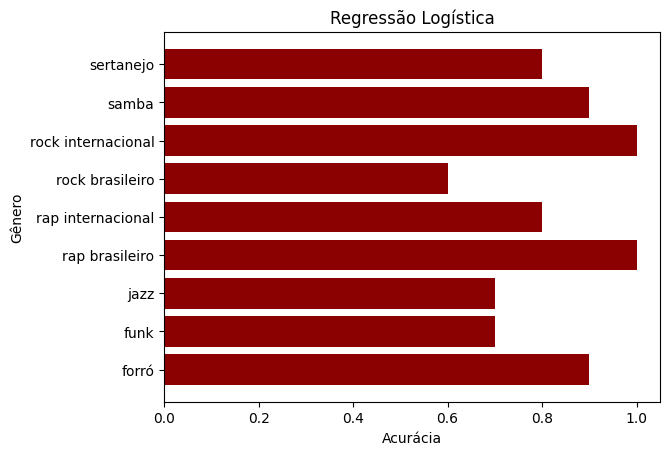

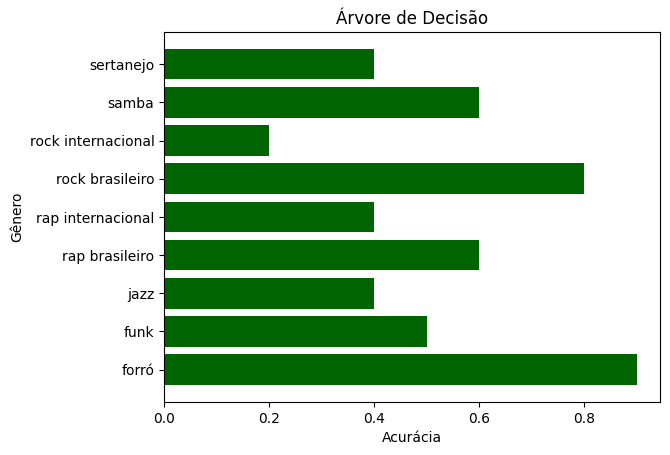

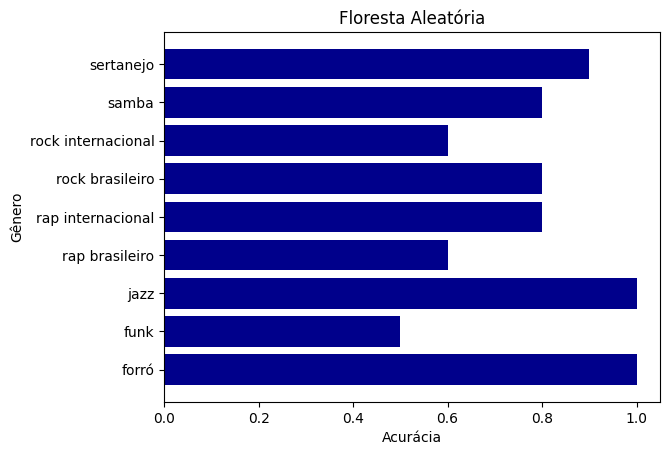

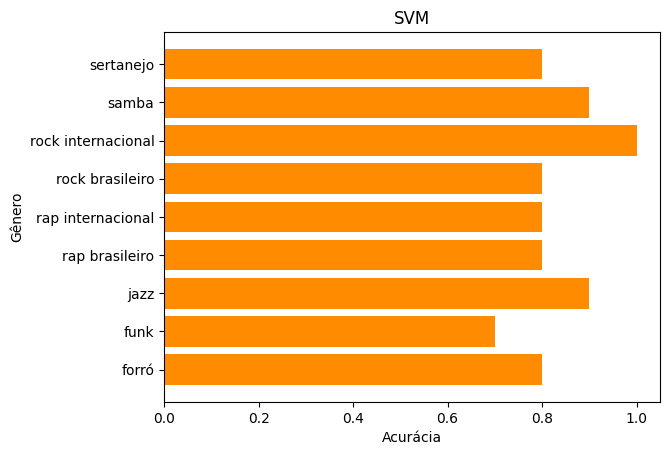

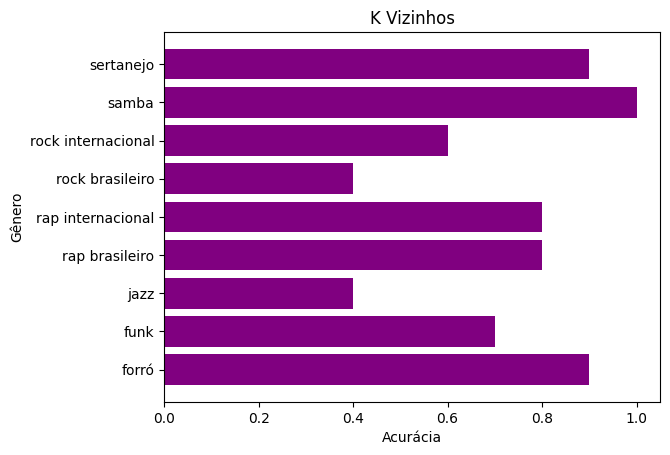

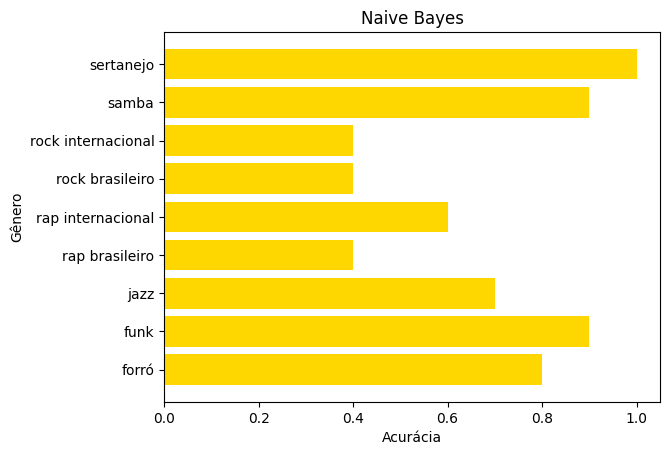

In [121]:
colors = ['darkred', 'darkgreen', 'darkblue', 'darkorange', 'purple', 'gold']

plt.barh(list(accuracy_by_genre_lr.keys()), list(accuracy_by_genre_lr.values()), color=colors[0])
plt.ylabel('Gênero')
plt.xlabel('Acurácia')
plt.title('Regressão Logística')
plt.show()

plt.barh(list(accuracy_by_genre_dt.keys()), list(accuracy_by_genre_dt.values()), color=colors[1])
plt.ylabel('Gênero')
plt.xlabel('Acurácia')
plt.title('Árvore de Decisão')
plt.show()

plt.barh(list(accuracy_by_genre_rf.keys()), list(accuracy_by_genre_rf.values()), color=colors[2])
plt.ylabel('Gênero')
plt.xlabel('Acurácia')
plt.title('Floresta Aleatória')
plt.show()

plt.barh(list(accuracy_by_genre_svm.keys()), list(accuracy_by_genre_svm.values()), color=colors[3])
plt.ylabel('Gênero')
plt.xlabel('Acurácia')
plt.title('SVM')
plt.show()

plt.barh(list(accuracy_by_genre_knn.keys()), list(accuracy_by_genre_knn.values()), color=colors[4])
plt.ylabel('Gênero')
plt.xlabel('Acurácia')
plt.title('K Vizinhos')
plt.show()

plt.barh(list(accuracy_by_genre_nb.keys()), list(accuracy_by_genre_nb.values()), color=colors[5])
plt.ylabel('Gênero')
plt.xlabel('Acurácia')
plt.title('Naive Bayes')
plt.show();